# MCSB Bootcamp 

Rachel Sousa

Simulate a transcription factor diffusion inside the cytoplasm, searching for a nuclear pore complex.

In [1]:
using PyPlot
using LinearAlgebra

In [2]:
#numerical parameters
dt = 0.001 #s
ntmax = 1e6

#number of samples
NSample = 2000

#model parameters 
D = 10 # microns^2/second
L = 10 # microns
init = L/2
NPCSize = 0.1 # microns
NPCLocation = [-L/2 0]

alpha = sqrt(2 * D * dt)

#data collections 
tCapture = zeros(NSample, 1);

In [3]:
function check_boundary(x)
    if x[1] > init
        x[1] = init
    elseif x[1] < -init
        x[1] = -init
    end
        
    if x[2] > init
        x[2] = init
    elseif x[2] < -init
        x[2] = -init
    end
    return x
end

check_boundary (generic function with 1 method)

In [6]:
# plot(NPCLocation[1], NPCLocation[2], "o", color="red", markersize = 10)
# xlabel("x (um)")
# ylabel("y (um)")
# xlim([-L/2, L/2])
# ylim([-L/2, L/2])

@time begin #start time

for iSample in 1:NSample
    #initial condition 
    x = [init 0]
    
    t = 0
    
    for nt in 1:ntmax
        #dynamics
        x += alpha * randn(1,2)
        
        #boundaries 
        x = check_boundary(x)
        
        #test for NPC capture 
        if ( (x[1] - NPCLocation[1])^2 + (x[2] - NPCLocation[2])^2 < NPCSize^2 )
            tCapture[iSample] = t
            break
        end
        
#         if false
#             plot(x[1], x[2], "o", color="blue")
#         end

        t = t + dt 
            
    end #finished loop through time
end #finished loop through samples

end #end time

 25.677812 seconds (693.77 M allocations: 17.549 GiB, 7.19% gc time)


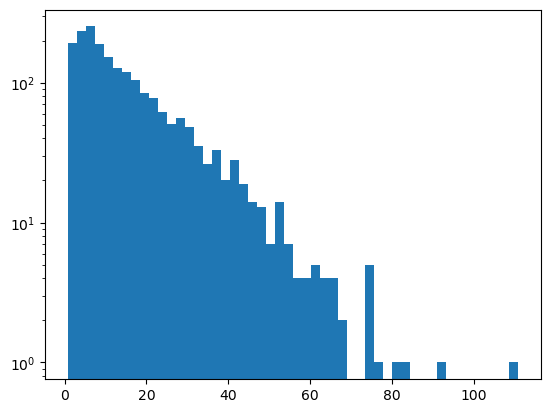

In [5]:
hist(tCapture, 50)
yscale("log")